In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import f_regression
from scipy.stats import f_oneway
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [4]:
df=pd.read_csv("car data.csv")

### Basic Data Exploration Results


#### The selected columns in this step are not final, further study will be done and then a final list will be created
- Car_Name: Categorical
- Year: Categorical
- Selling_Price: Continuous
- Present_Price: Continuous
- Kms_Driven: Continuous
- Fuel_Type: Categorical
- Seller_Type: Categorical
- Transmission: Categorical
- Owner: Categorical

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Data Preprocessing  - Checking outliers , any missing values or data quality issues

In [6]:
df.info()  # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df["Selling_Price"]=df["Selling_Price"]*100000
df["Present_Price"]=df["Present_Price"]*100000

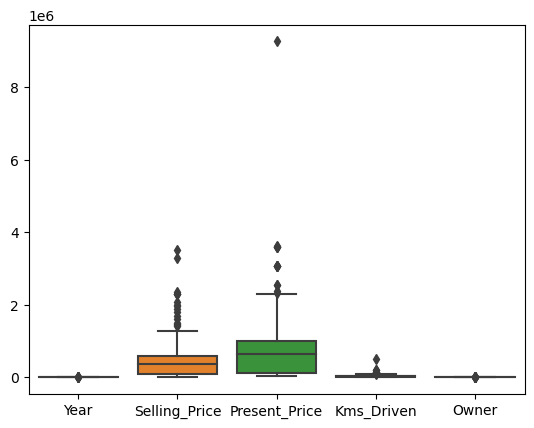

In [10]:
sns.boxplot(data=df)
plt.show()

In [11]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000.0,559000.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000.0,954000.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000.0,985000.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000.0,415000.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000.0,687000.0,42450,Diesel,Dealer,Manual,0


#### Edit the column value and column name   - Converting year to Car_age

In [12]:
age=date.today().year-df["Year"]

In [13]:
df["Year"]=age
df.rename({"Year":"car_age"},axis=1,inplace=True)

In [14]:
df["Selling_Price"]=df["Selling_Price"].astype(int)
df["Present_Price"]=df["Present_Price"].astype(int)

In [15]:
df

,Car_Name,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,9,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,10,475000,953999,43000,Diesel,Dealer,Manual,0
2,ciaz,6,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,12,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,9,459999,687000,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,7,950000,1160000,33988,Diesel,Dealer,Manual,0
297,brio,8,400000,590000,60000,Petrol,Dealer,Manual,0
298,city,14,335000,1100000,87934,Petrol,Dealer,Manual,0
299,city,6,1150000,1250000,9000,Diesel,Dealer,Manual,0


In [148]:
df.to_csv("final car.csv")

## Data Analysis

#### Visual exploration (Categorical Vs Continuous)

In [16]:
cat_col= ["Car_Name","Fuel_Type","Seller_Type","Transmission"]
target_col=["selling_price"]
numerical_col=["Kms_Driven","car_age","Present_Price","Owner"]

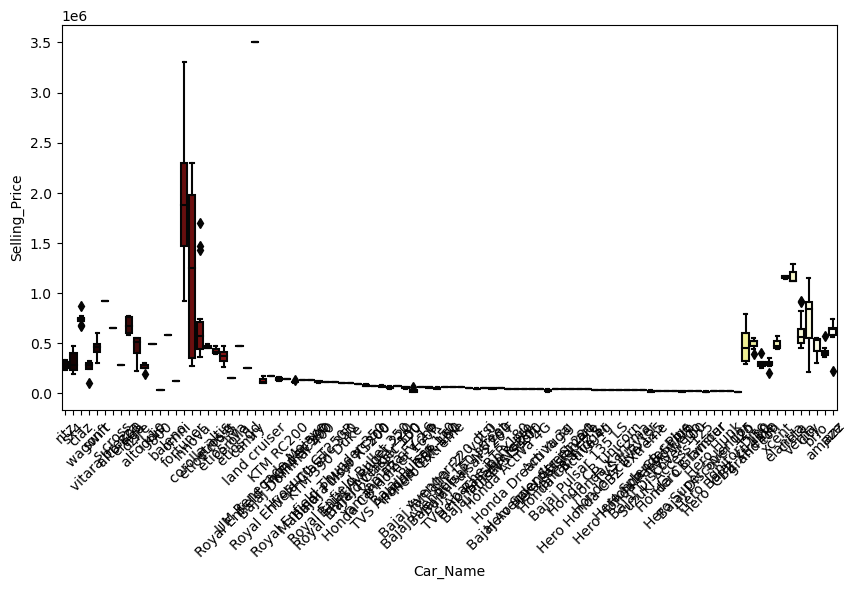

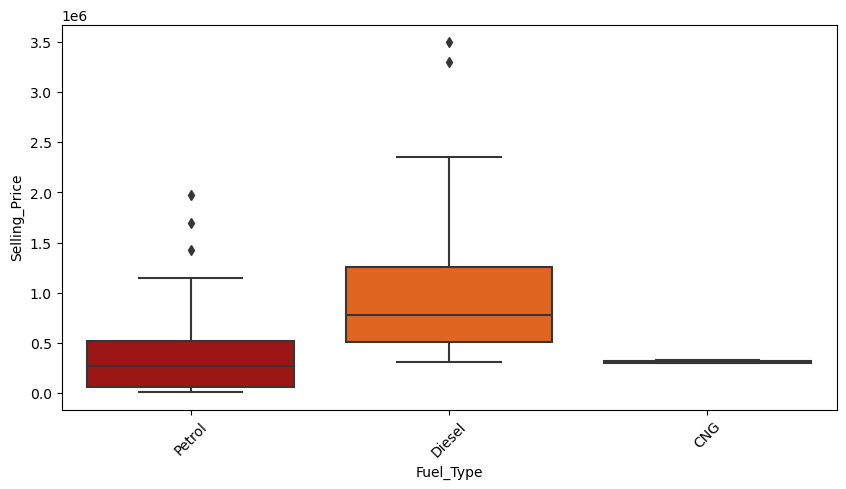

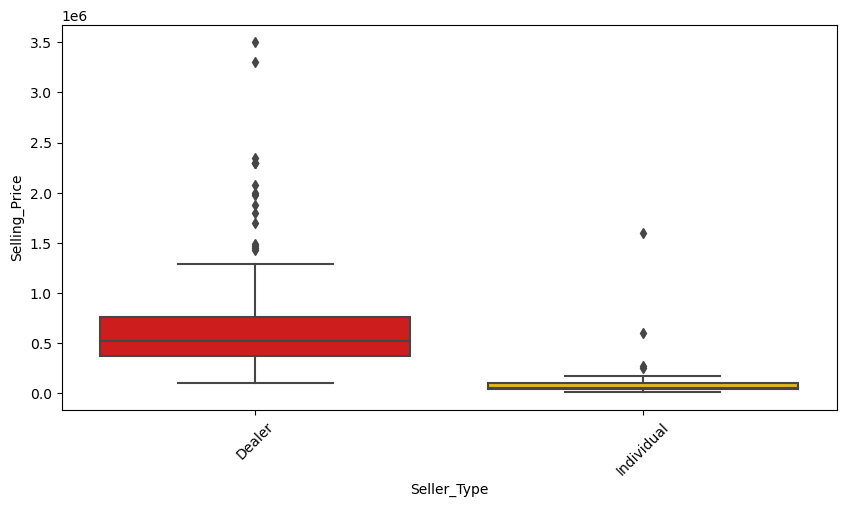

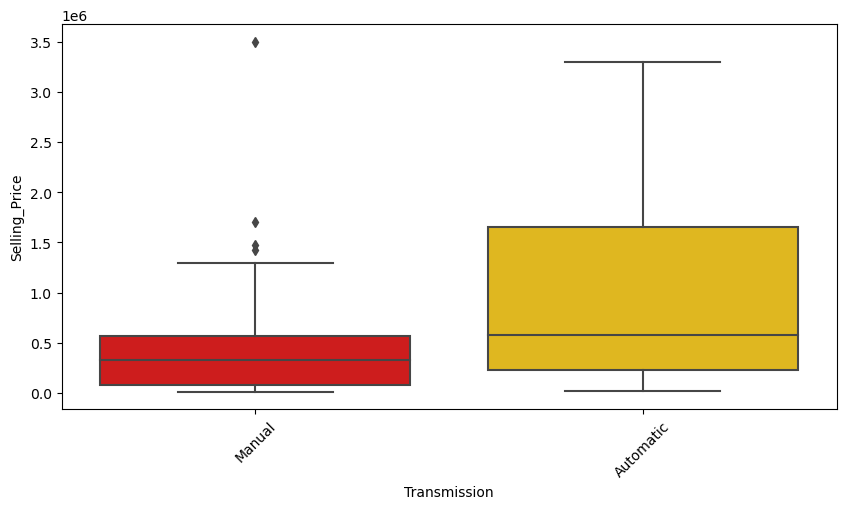

In [17]:
for cat in cat_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=cat,y="Selling_Price",palette="hot",data=df)
    plt.xticks(rotation=45)
    plt.show()

#### Visual exploration (Continuous Vs Continuous)

<AxesSubplot:>

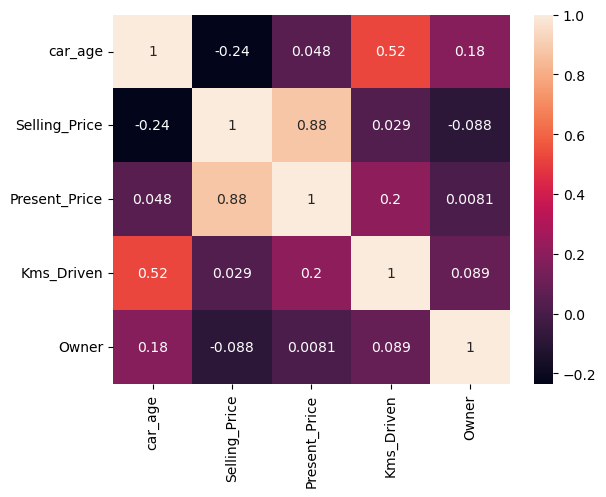

In [18]:
sns.heatmap(df.corr(),annot=True)

## Statistical Feature Selection (Categorical Vs Continuous) - Using ANOVA test

In [19]:
def anovatest(data,targetvar,catpredictlist): 
    predictcol=[]
    for i in catpredictlist:
        
        cat_group_list=df.groupby(i)[targetvar].apply(list)
        anovaresult=f_oneway(*cat_group_list)
        if(anovaresult[1]<0.05):
            print(i,"is correlated with",targetvar,"| P-Value", anovaresult[1])
            predictcol.append(i)
        else:
            print(i,"is NOT correlated with",targetvar,"| P-Value", anovaresult[1])
    return(predictcol)

In [20]:
anovatest(df,"Selling_Price",cat_col)

Car_Name is correlated with Selling_Price | P-Value 1.4377558909371603e-36
Fuel_Type is correlated with Selling_Price | P-Value 2.803929220192019e-24
Seller_Type is correlated with Selling_Price | P-Value 2.852425145855596e-25
Transmission is correlated with Selling_Price | P-Value 4.901438331146502e-11


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

## Linear Regression - Train - test Split

In [21]:
x=df.drop(["Selling_Price","Owner"],axis=1)
y=df["Selling_Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=336)

In [22]:
catr_col= ["Car_Name","Fuel_Type","Seller_Type","Transmission"]
num_col=["Kms_Driven","car_age","Present_Price"]

#### Tranforming Categorical value to Numerical Value

In [23]:
oe= OneHotEncoder()
oe.fit(x[catr_col])

OneHotEncoder()

In [24]:
linreg=LinearRegression()

In [27]:
column_trans=make_column_transformer((OneHotEncoder(categories=oe.categories_),catr_col),remainder='passthrough')

#### Make pipeline and fit them into training model

In [28]:
pipe = make_pipeline(column_trans,linreg)

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Baj...
       'grand i10', 'i10', 'i20', 'ignis', 'innova', 'jazz',
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Seller_Type',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

In [30]:
y_pred=pipe.predict(x_test)

### Finding best random state value to imrove the model

In [32]:
best_random_state=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    linreg=LinearRegression()
    pipe = make_pipeline(column_trans,linreg)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    best_random_state.append(metrics.r2_score(y_test,y_pred))

In [33]:
np.argmax(best_random_state)

336

In [34]:
best_random_state[np.argmax(best_random_state)]

0.9143434237878817

## Model Evaluation - Finding R2 score,MAE, RMSE,MSE etc/...........

In [35]:
print("Mean absolute error is         {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("Root Mean square error is      {}".format(np.sqrt(metrics.mean_squared_error(y_pred,y_test))))
print("Mean square error is           {}".format(metrics.mean_squared_error(y_pred,y_test)))
print("R2 score                       {}".format(metrics.r2_score(y_test,y_pred)))

Mean absolute error is         124019.1114334752
Root Mean square error is      174467.56170813515
Mean square error is           30438930088.38195
R2 score                       0.8687115959504801


#### plot the predict value and actual value

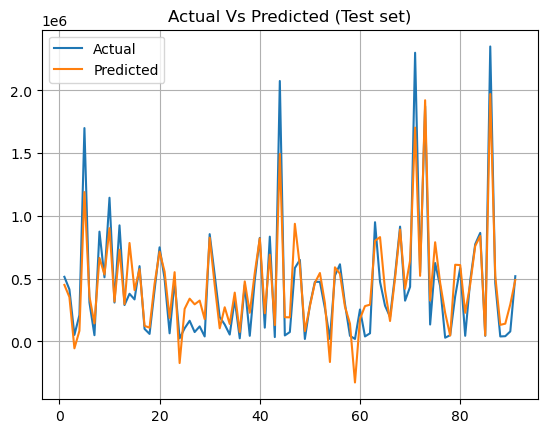

In [36]:
x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [37]:
import pickle

In [38]:
pickle.dump(pipe,open("linreg_pickle.pkl","wb"))

In [39]:
pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['ritz',9,559000,27000,'Petrol',"Dealer","Manual"]).reshape(1,7)))

array([389080.84784026])

In [45]:
pipe.predict(pd.DataFrame(columns=['Car_Name','car_age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission'],data=np.array(['ritz',9,559000,27000,'Petrol',"Dealer","Manual"]).reshape(1,7)))

array([389080.84784026])